In [2]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
import sys
from functools import partial 
from scipy import stats, optimize
import scipy
from tqdm import tqdm
from appstatpy.ExternalFunctions import *
from appstatpy.LatexFunctions import *
from sympy import *

### You are optimising container transport, in particular the time, ∆t, between the daily
### truck arrival (120 minutes uncertainty) and ship departure (50 minutes uncertainty).
- If ∆t = 130 minutes, what fraction of containers will have wait to the next day?

This is more a problem of understanding the problem rather than to solve it. We are given that two events are described as two gaussian 
distributions, where the two means deviate with 130. To sample the problem we draw a number from each of the distributions, if the drawn ship value is lower than the one drawn for the truck, the truck has to wait 24 hours - the delay of the truck. (Here we assume that the ship departs at time = 0

Instead of sampling from two different distributions, we instead combine them to make one. 

$$\mu = \mu_{Ship} + \mu_{Truck}$$
$$\sigma^2 = \sigma_{Ship} + \sigma_{Truck}$$

We find the fraction by evaluating the integral of the gaussian in
the interval [0 : ∞], this is best done with a survival function. We
end up with a fraction of .16


From this, we could then find the fraction of samples above the
threshold. From the figure we estimate the optimal delay at around
∆t = 200. As we are sampling the data, we could estimate an error
on each avg, and fit a parabola or the like to get a more precise value
with errors.

In [3]:
delta_t = 130
truck_sigma = 120
ferry_sigma = 50
solution = (stats.norm.pdf(0,loc=130,scale=np.sqrt(truck_sigma**2+ferry_sigma**2)))
print(solution)

0.001861313265531872


- For what value of ∆t do containers on average have the least waiting time?

Here we will make a sampling approach, as this is a relativly simple problem one could also solve it analytically, but we will not cover this here as it would not be a general approach

To sample the problem, we draw 10000 random variates, with a varried $\Delta t$. All values that are below 0, does nt make it, and we set the waiting time at 24 hours - the drawn value (We subtrack the delay). We record every waiting time for the samples and calculate the mean for each $\Delta t$. We do this for all values and plot the data. For this problem we only need to estimate the $\Delta t$, so an answer of 200 would be sufficient

However, if we look at the plot, it looks like the minimum could be decribed as a second degree polynomium, and if we fit the data to this, we can then find the minimum of that function and use this for our estimation. Here we can defined the errors as the error on the mean of the delay. 

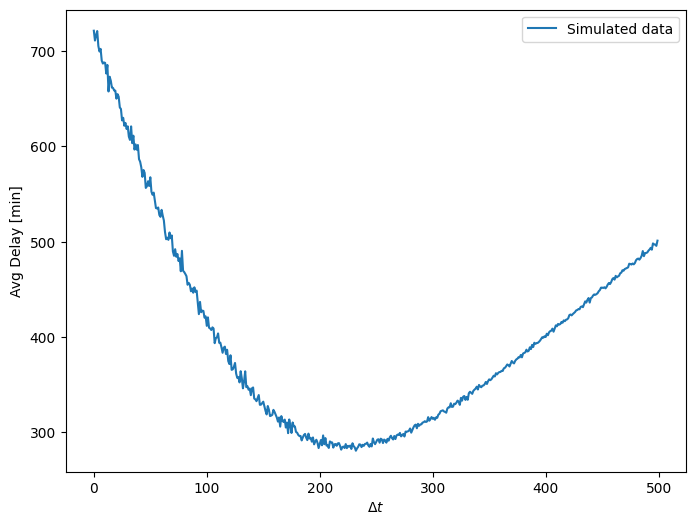

In [4]:




delay = np.arange(0, 500, 1)
wait = np.zeros(500)
frac = np.zeros(500)
for i, dt in enumerate(delay):
    comb = np.random.normal( -dt, np.sqrt(ferry_sigma**2 + truck_sigma**2), 10000)
    comb[comb > 0] -= 24*60
    frac_ = stats.norm.sf(0, -dt, np.sqrt(ferry_sigma**2 + truck_sigma**2))
    rfrac = 1 - frac_
    avg_wait = np.mean(comb)
    wait[i] = avg_wait
    

fig, ax = plt.subplots(1,1, figsize = (8,6))

ax.plot(delay, -wait)

ax.set_xlabel('$\Delta t$')
ax.set_ylabel('Avg Delay [min]')
ax.legend(['Simulated data', 'Analytical attempt'])
plt.savefig('images/Containers')
plt.show()
